In [1]:
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [12]:
def encodeAdj(genome):
    l = len(genome)
    adjacency = np.zeros(l*2 + 2, dtype=np.int32)
    adjacency[0] = -1

    for i in range(l):
        genin = genome[i] * 2
        if genome[i] > 0:
            adjacency[i*2 + 1] = genin - 1
            adjacency[i*2 + 2] = genin
        else:
            adjacency[i*2 + 1] = -genin
            adjacency[i*2 + 2] = -genin - 1

    adjacency[l * 2 + 1] = -1
    return adjacency

In [3]:
def curve_line(p1, p2):
    if p1 == p2:
        return (p1, p1)
    if p2 < p1:
        p1, p2 = p2, p1
    x = np.linspace(p1, p2, 100 * (p2 - p1))
    wid = p2 - p1 + 2
    rad = (x - p1 + 1)/wid * np.pi
    y = (np.sin(rad) - np.sin(1/wid * np.pi))/(1 - np.sin(1/wid * np.pi))
    return (x, np.absolute(y))

In [4]:
def draw_curve(adjList, color = 'k', scale = 1):
    size = adjList.size//2 - 1
    for t in np.arange(size*2 - 1) + 1:
        p1, p2 = adjList[t], adjList[t + 1]
        if np.abs(p1-p2) == 1:
            s = 0.1 * scale
        else:
            s = 1 * scale
        x, y = curve_line(p1, p2)
        if t%2 == 0:
            plt.plot(x, y * s, color = color)        
        else:
            plt.plot(x, y * s, color = 'k')        

In [5]:
def draw_base(size):
    points = np.arange(size * 2) + 1
    for p in points:
        plt.plot(p, 0, 'o')
    for t in np.arange(size*2 - 1) + 1:
        if t%2 == 0:
            color = 'c'        
        else:
            color = 'k'
        plt.plot([t, t + 1], [0, 0], 'o', linestyle='-.', color = color)

gnome1, gnome2, gnome3

In [6]:
g1 = [1,2,3,4,5,6,7,8,-180,60,-155,-154,-153,-152,190,191,192,193,-110,-109,-108,-99,-98,-97,-96,
     85,86,87,88,89,90,91,92,93,94,95,-84,-131,-130,-129,-128,-157,-156,61,62,63,-53,-52,32,33,34,
     177,178,-137,-136,-135,-134,-133,-132,-83,-82,-81,-80,-79,-78,-102,-164,-163,-40,103,104,-199,
     -198,-197,-196,-195,-194,111,112,179,-183,-45,-118,-51,-50,-49,-48,-47,-46,101,-175,-174,165,
     166,167,168,169,170,171,172,173,176,35,-127,-126,-125,-124,-123,-122,-121,-120,-119,-44,-43,
     -42,25,26,27,140,141,142,143,144,145,146,147,148,-21,-20,-19,-139,-138,113,114,115,116,117,-31,
     -30,158,159,160,161,162,41,-24,-23,-22,149,150,151,-189,-188,75,76,77,-39,-38,-37,-36,-29,-28,-18,
     -17,-16,-15,-14,-13,-12,-11,-10,185,186,187,-74,-73,-72,-71,-70,-69,-68,-67,-66,-65,-64,54,55,56,57,
     58,59,184,-9,181,182,-100,-107,-106,-105,200];
g2 = [1,2,3,4,88,-161,-160,-159,-158,-157,-156,-155,-154,-153,-152,190,178,113,114,87,5,6,7,8,9,10,11,12,13,
      14,15,16,17,168,169,170,171,79,80,81,82,83,84,85,86,115,116,-90,-89,162,163,164,-173,-172,-78,-77,109,
      110,-193,-192,-191,-177,53,54,55,56,-24,-23,-22,149,150,151,-189,-188,75,76,-108,-107,-106,21,-148,-147,
      -146,-179,-112,-111,194,195,196,197,198,199,-39,-38,-37,-36,-35,-176,102,103,104,-121,28,29,-18,-167,-166,
      -165,174,175,-101,46,47,48,49,120,30,31,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,
      139,140,141,142,143,144,145,-183,-182,-181,-180,184,-25,42,43,44,45,-100,-99,-98,-97,95,96,-94,-93,-92,
      -91,117,118,119,50,51,52,-34,-33,-32,-122,105,-20,-19,-27,-26,185,186,187,-74,-73,-72,-71,-70,-69,-68,-67,
      -66,-65,-64,-63,-62,-61,-60,-59,-58,-57,-41,-40,200];
g3 = [1,2,-23,-22,149,150,-21,-20,-19,-67,-66,-65,-64,199,-39,-38,-37,-36,-35,-176,102,103,104,-121,-29,-110,
      -109,77,78,148,-187,-186,-185,26,27,68,69,70,71,72,73,74,151,12,13,14,15,177,178,113,114,115,116,-90,
      -89,162,163,164,193,-28,-18,91,92,93,40,41,-24,3,4,88,-161,-160,-159,-158,-157,-156,-155,-154,-153,
      -152,190,191,192,-173,-172,9,10,-179,-112,-111,194,195,196,32,33,34,87,5,6,7,-129,-128,-127,-126,-125,
      -124,-123,-31,-30,-120,-49,-48,-60,-59,-58,-57,-56,-55,-54,-53,136,-141,-140,-139,-138,-137,61,166,167,117,
      118,119,50,51,52,-86,-85,-84,181,182,183,-17,-16,-135,63,-198,-197,-122,105,106,107,108,-76,-75,188,189,
      -11,146,147,-42,25,-184,180,-83,-82,-81,-80,-79,142,143,144,145,168,169,170,171,-8,130,131,132,-46,101,-175,
      -174,165,62,-134,133,47,43,44,45,-100,-99,-98,-97,95,96,-94,200];

In [87]:
A = encodeAdj(g1)
B = encodeAdj(g2)
C = encodeAdj(g3)

In [16]:
A

array([ -1,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16, 360, 359, 119, 120, 310, 309, 308, 307, 306,
       305, 304, 303, 379, 380, 381, 382, 383, 384, 385, 386, 220, 219,
       218, 217, 216, 215, 198, 197, 196, 195, 194, 193, 192, 191, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 168, 167, 262, 261, 260,
       259, 258, 257, 256, 255, 314, 313, 312, 311, 121, 122, 123, 124,
       125, 126, 106, 105, 104, 103,  63,  64,  65,  66,  67,  68, 353,
       354, 355, 356, 274, 273, 272, 271, 270, 269, 268, 267, 266, 265,
       264, 263, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156,
       155, 204, 203, 328, 327, 326, 325,  80,  79, 205, 206, 207, 208,
       398, 397, 396, 395, 394, 393, 392, 391, 390, 389, 388, 387, 221,
       222, 223, 224, 357, 358, 366, 365,  90,  89, 236, 235, 102, 101,
       100,  99,  98,  97,  96,  95,  94,  93,  92,  91, 201, 20

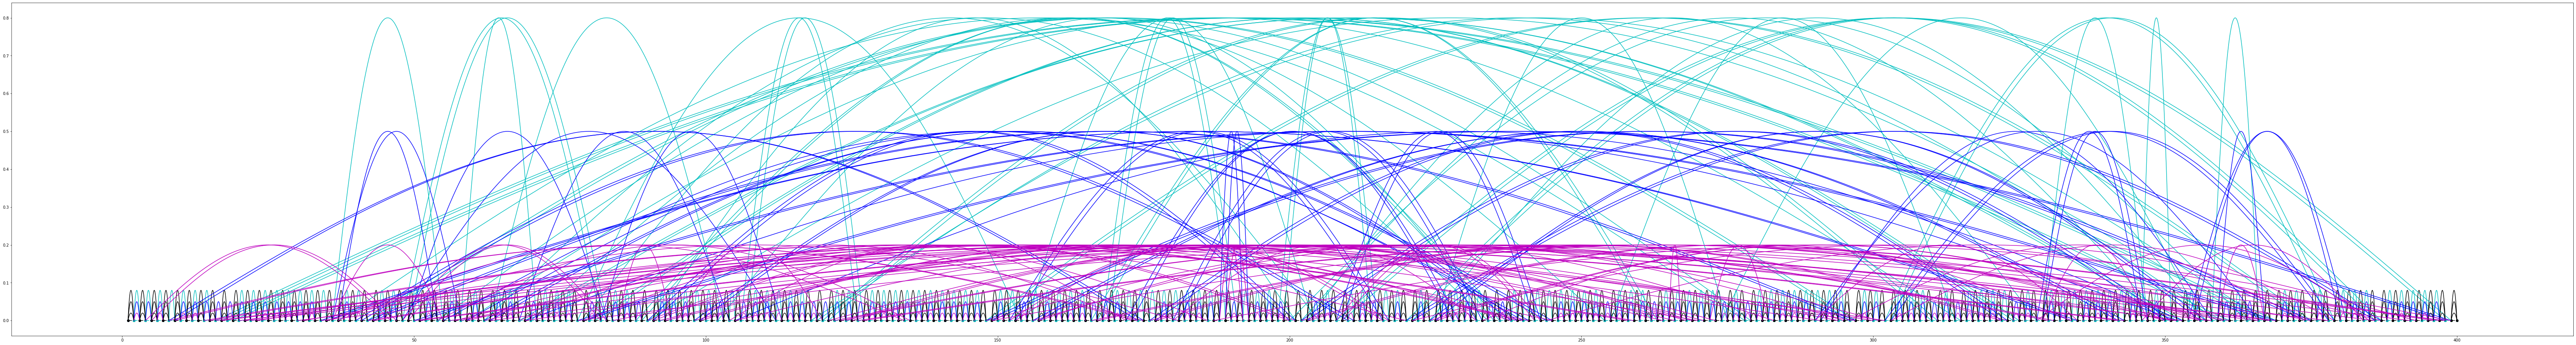

In [15]:
figure(figsize=(120, 16))

draw_base(A.size//2 - 1)
draw_curve(A, color = 'c', scale = 0.8)
draw_curve(B, color = 'b', scale = 0.5)
draw_curve(C, color = 'm', scale = 0.2)

In [84]:
def gen_graph(*genomes):
    graph_adj = np.empty((2,0))
    for genome in genomes:
        gene_adj = encodeAdj(genome)
        graph_adj = np.concatenate((graph_adj, 
                        np.stack((gene_adj[1:-2], 
                                    gene_adj[2:-1]))), axis = 1)
    return graph_adj

In [88]:
res = gen_graph(A, B, C)

In [90]:
res.shape

(2, 2409)